# **Abhishek Karmakar (ids2022007) && Sharik Gazi (ids2022009)**

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 48 kB/s 
     |████████████████████████████████| 199 kB 57.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=3777d05f59379fabe92ad4f19826144bb9a9c2212137eb20fc497e0edddaec22
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"karmakarabhishek5","key":"36b4a526001d0aea0dbb0308eec30991"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           7873        259  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           6357        203  1.0              
whenamancodes/students-performance-in-exams                     Students Performance in Exams                  9KB  2022-09-14 15:14:54          11178        201  1.0              
dimitryzub/walmart-coffee-listings-from-500-stores              Walmart Coffee Listings from 50

In [ ]:
!kaggle datasets download -d uciml/electric-power-consumption-data-set

electric-power-consumption-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 electric-power-consumption-data-set.zip  'kaggle (1).json'   sample_data
 household_power_consumption.txt	   kaggle.json


In [ ]:
!unzip electric-power-consumption-data-set.zip

Archive:  electric-power-consumption-data-set.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

electric-power-consumption-data-set.zip  kaggle.json
household_power_consumption.txt		 sample_data


Step 0 : Import Necessary Packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1) Note that data include 'nan' and '?' as a string. I converted both to numpy nan in importing stage (above) and treated both of them the same.

2) I merged two columns 'Date' and 'Time' to 'dt'.

3) I also converted in the above, the data to time-series type, by taking index to be the time.


In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [ ]:
df.head(10)

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
2006-12-16 17:29:00                3.520                  0.522   235.02   
2006-12-16 17:30:00                3.702                  0.520   235.09   
2006-12-16 17:31:00                3.700                  0.520   235.22   
2006-12-16 17:32:00                3.668                  0.510   233.99   
2006-12-16 17:33:00                3.662                  0.510   233.86   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
2006-12-16 17:29:00              15.0             0.0             2.0   
2006-12-16 17:30:00              15.8             0.0             1.0   
2006-12-16 17:31:00              15.8             0.0             1.0   
2006-12-16 17:32:00              15.8             0.0             1.0   
2006-12-16 17:33:00              15.8             0.0             2.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0  
2006-12-16 17:29:00            17.0  
2006-12-16 17:30:00            17.0  
2006-12-16 17:31:00            17.0  
2006-12-16 17:32:00            17.0  
2006-12-16 17:33:00            16.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

count        mean       std      min      10%  \
Global_active_power    2049280.0    1.091615  1.057294    0.076    0.222   
Global_reactive_power  2049280.0    0.123714  0.112722    0.000    0.000   
Voltage                2049280.0  240.839858  3.239987  223.200  236.680   
Global_intensity       2049280.0    4.627759  4.444396    0.200    1.000   
Sub_metering_1         2049280.0    1.121923  6.153031    0.000    0.000   
Sub_metering_2         2049280.0    1.298520  5.822026    0.000    0.000   
Sub_metering_3         2049280.0    6.458447  8.437154    0.000    0.000   

                           25%      50%      75%      90%      95%      99%  \
Global_active_power      0.308    0.602    1.528    2.470    3.264    4.850   
Global_reactive_power    0.048    0.100    0.194    0.268    0.338    0.478   
Voltage                238.990  241.010  242.890  244.710  245.940  248.270   
Global_intensity         1.400    2.600    6.400   10.400   13.800   20.600   
Sub_metering_1           0.000    0.000    0.000    0.000    1.000   38.000   
Sub_metering_2           0.000    0.000    1.000    2.000    2.000   36.000   
Sub_metering_3           0.000    1.000   17.000   18.000   19.000   20.000   

                           max  
Global_active_power     11.122  
Global_reactive_power    1.390  
Voltage                254.150  
Global_intensity        48.400  
Sub_metering_1          88.000  
Sub_metering_2          80.000  
Sub_metering_3          31.000

In [ ]:
len(df)

2075259

In [ ]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

Step 1: Import & cleaning data

In [ ]:
df.shape
# This database have 20,75,259 rows and 7 columns. Let's check the NA data and fill na data with the mean values.

(2075259, 7)

In [ ]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

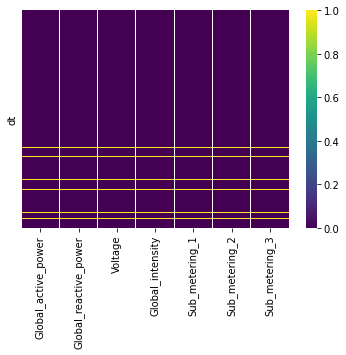

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [ ]:
df = df.fillna(df.mean())
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

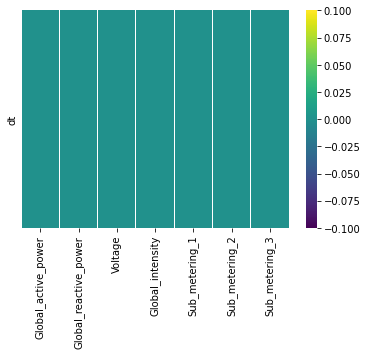

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

Step 2: Data visualizations¶


In [ ]:
# Plotting the "just data" has very high granuality.
# Therefore we have re-sample the data to make it comvenient.

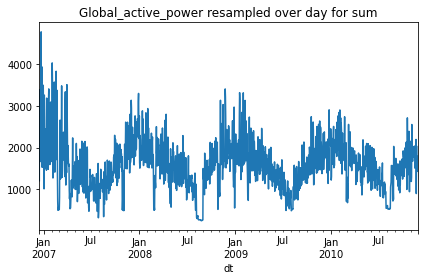

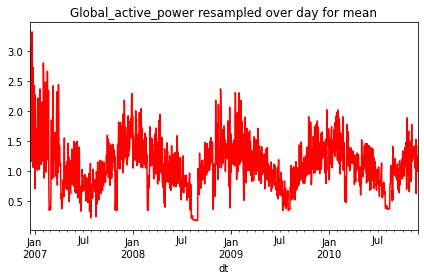

In [ ]:
# Below we resample over day, and show the sum and mean of Global_active_power. 
# It is seen that mean and sum of resampled data set, have similar structure.
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum')  
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

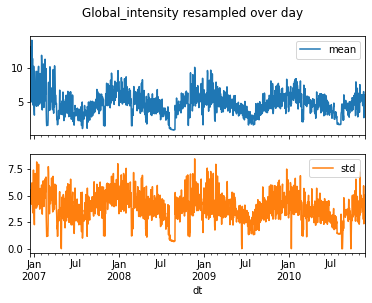

In [ ]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

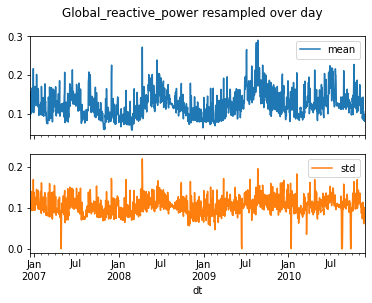

In [ ]:
### Below I show mean and std of 'Global_reactive_power' resampled over day
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day')
plt.show()

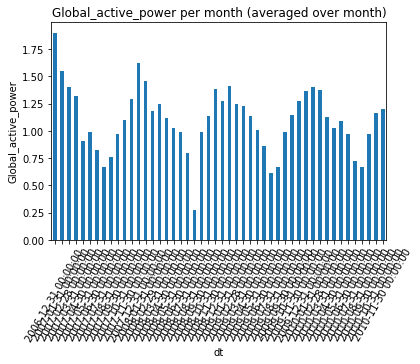

In [ ]:
### Sum of 'Global_active_power' resampled over month
# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

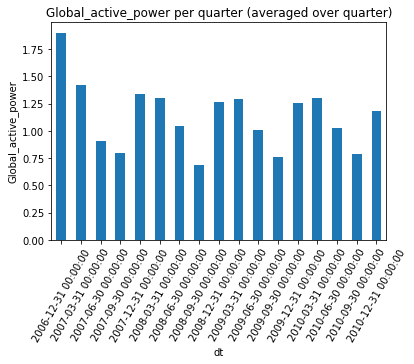

In [ ]:
## Mean of 'Global_active_power' resampled over quarter
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

It is very important to note from above two plots that resampling over larger time inteval, will diminish the periodicity of system as we expect. This is important for machine learning feature engineering

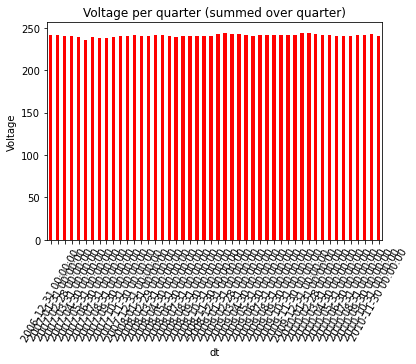

In [ ]:
## mean of 'Voltage' resampled over month
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

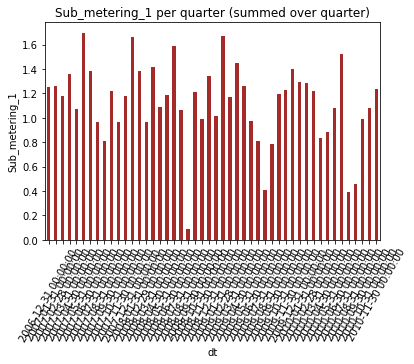

In [ ]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

It is seen from the above plots that the mean of 'Volage' over month is pretty much constant compared to other features. This is important again in feature selection

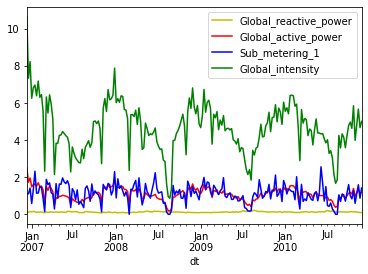

In [ ]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

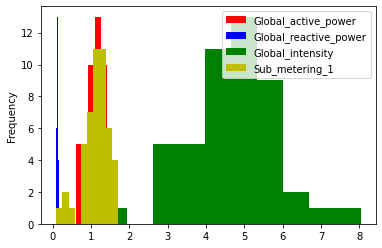

In [ ]:
# Below I show hist plot of the mean of different feature resampled over month 
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

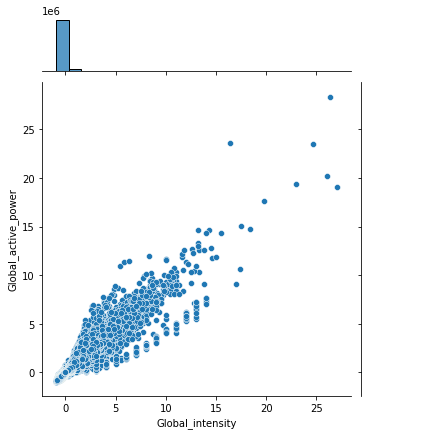

In [ ]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose

In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

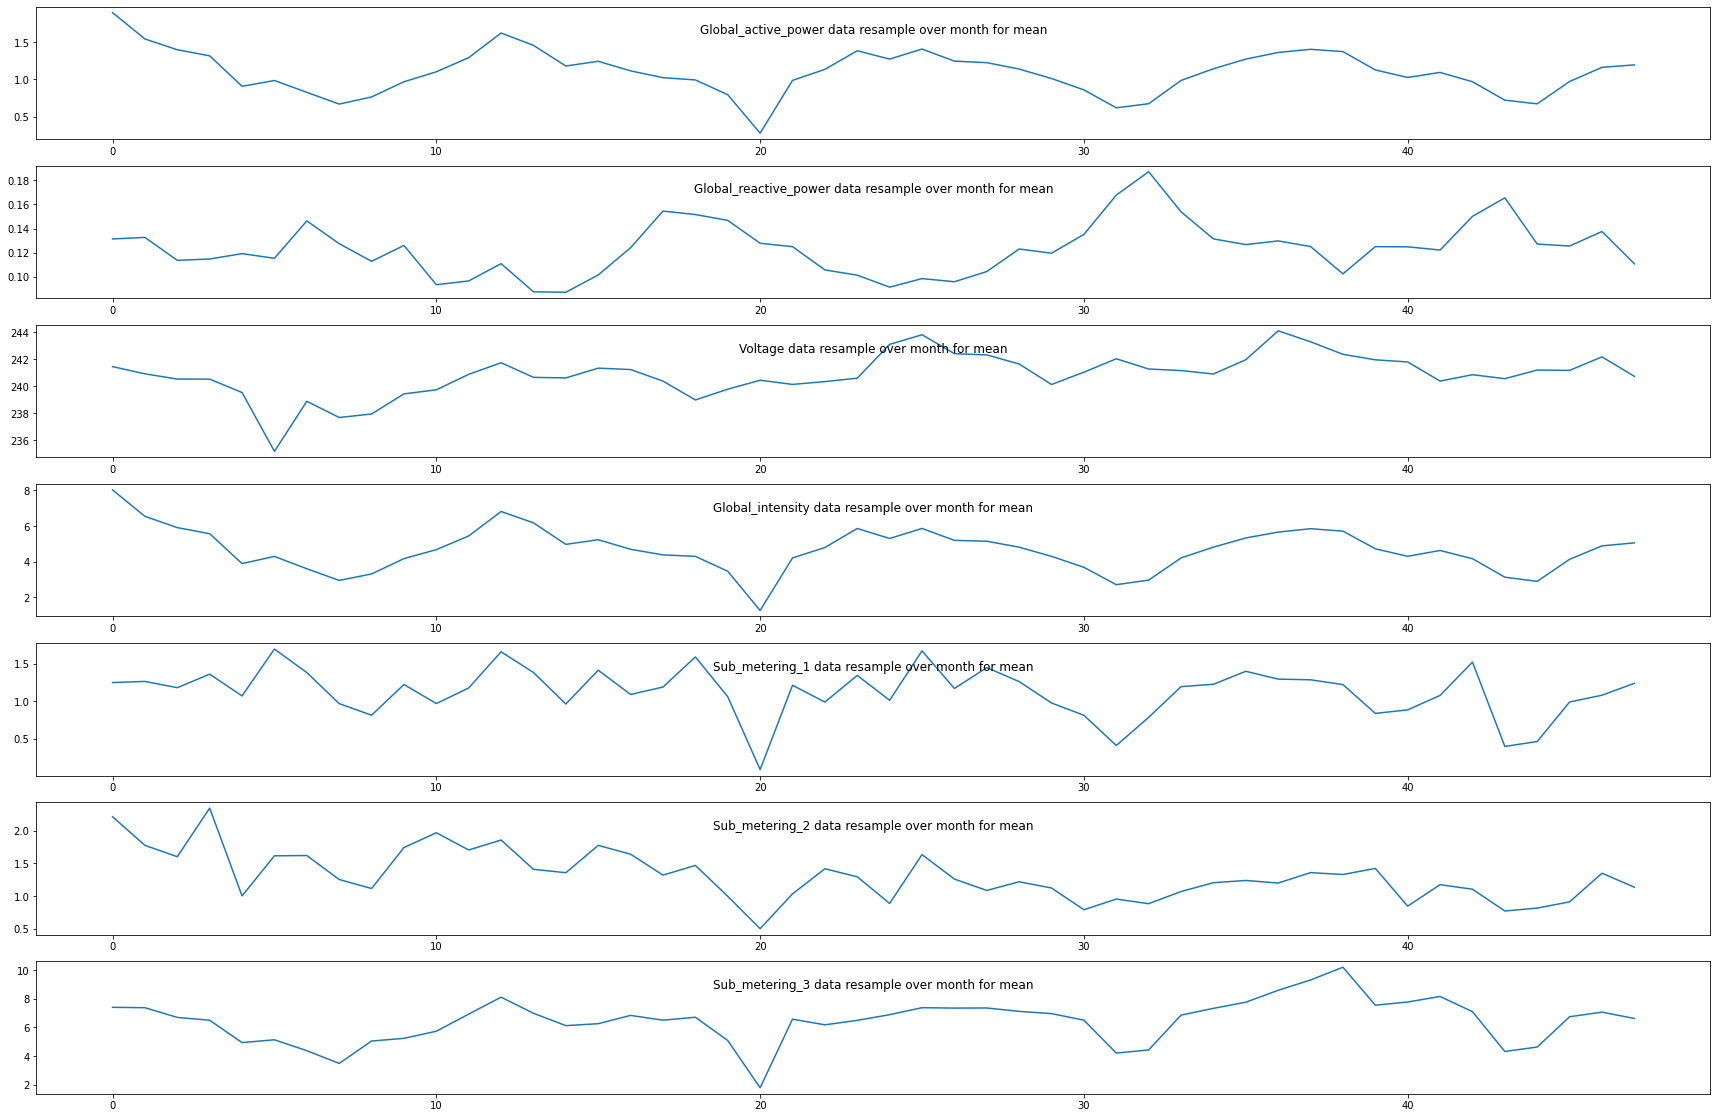

In [ ]:
# Month wise Re-Sampling
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(30, 20))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='center')
    i += 1
plt.show()


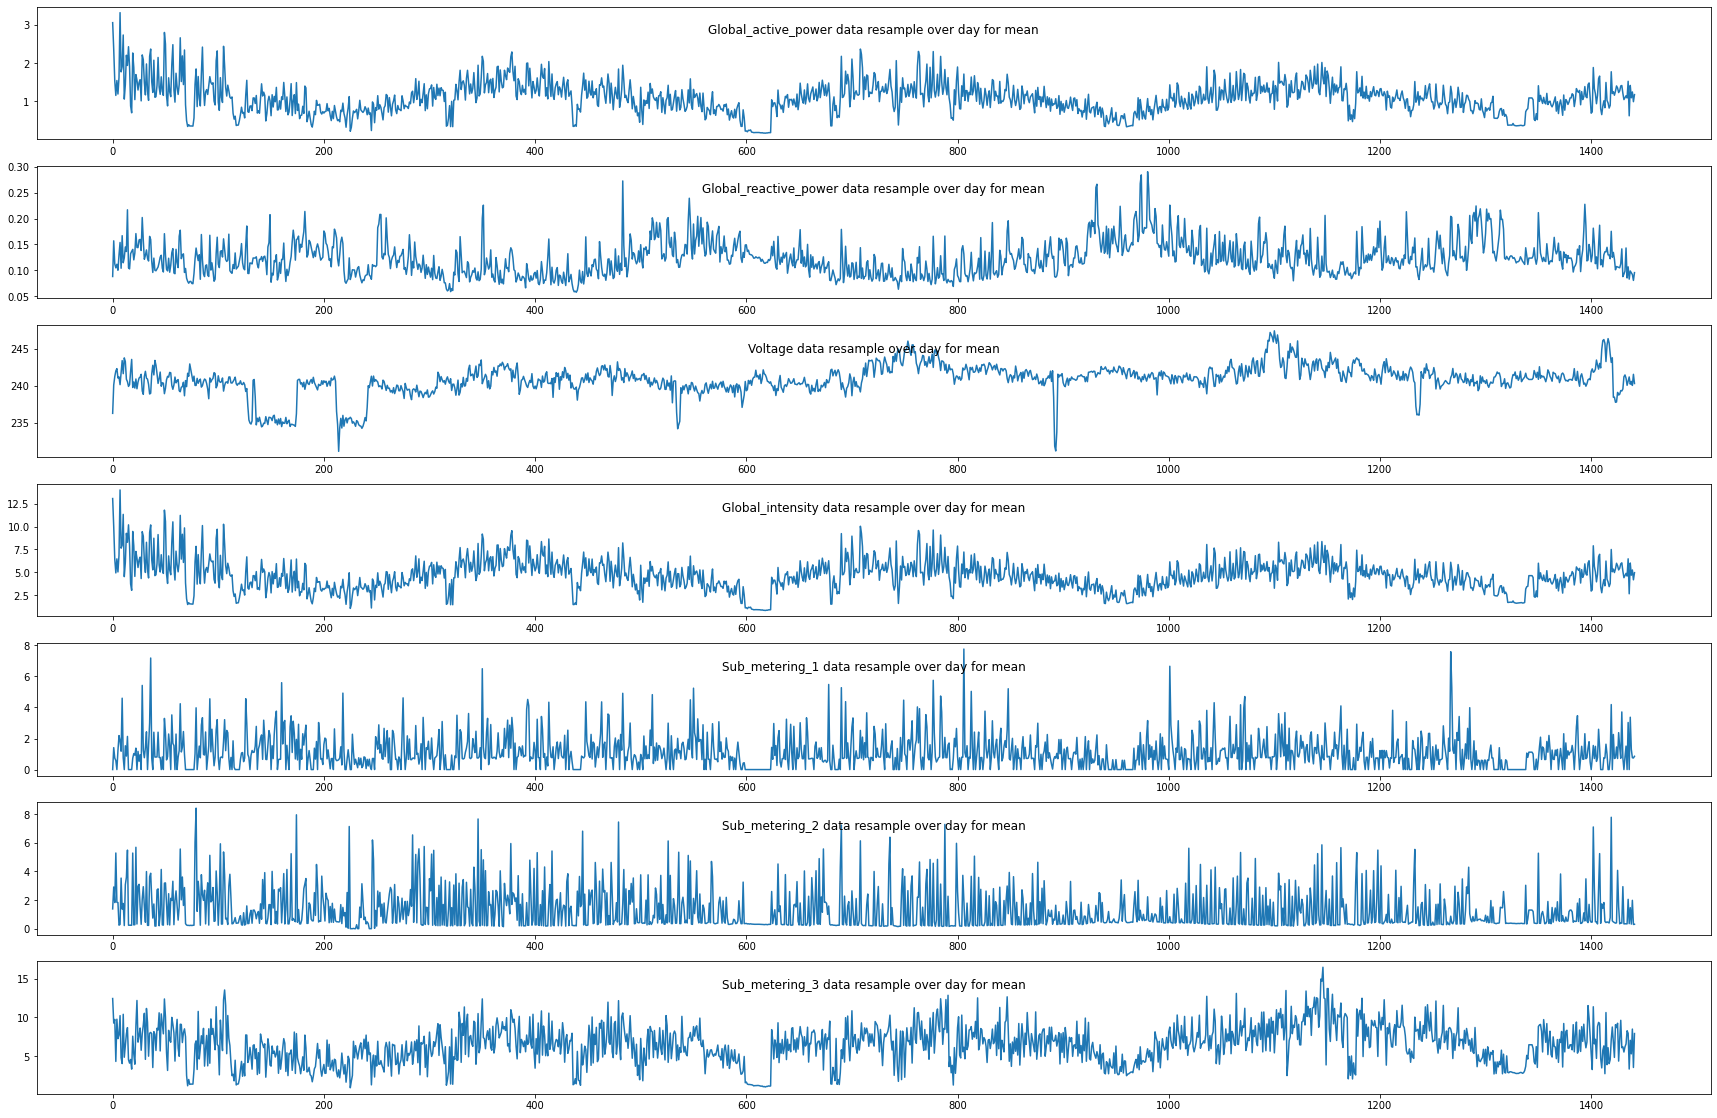

In [ ]:
# Day wise Re-Sampling
# Below we compare the mean of different featuresresampled over day. 
# specify columns to plot
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(30, 20))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

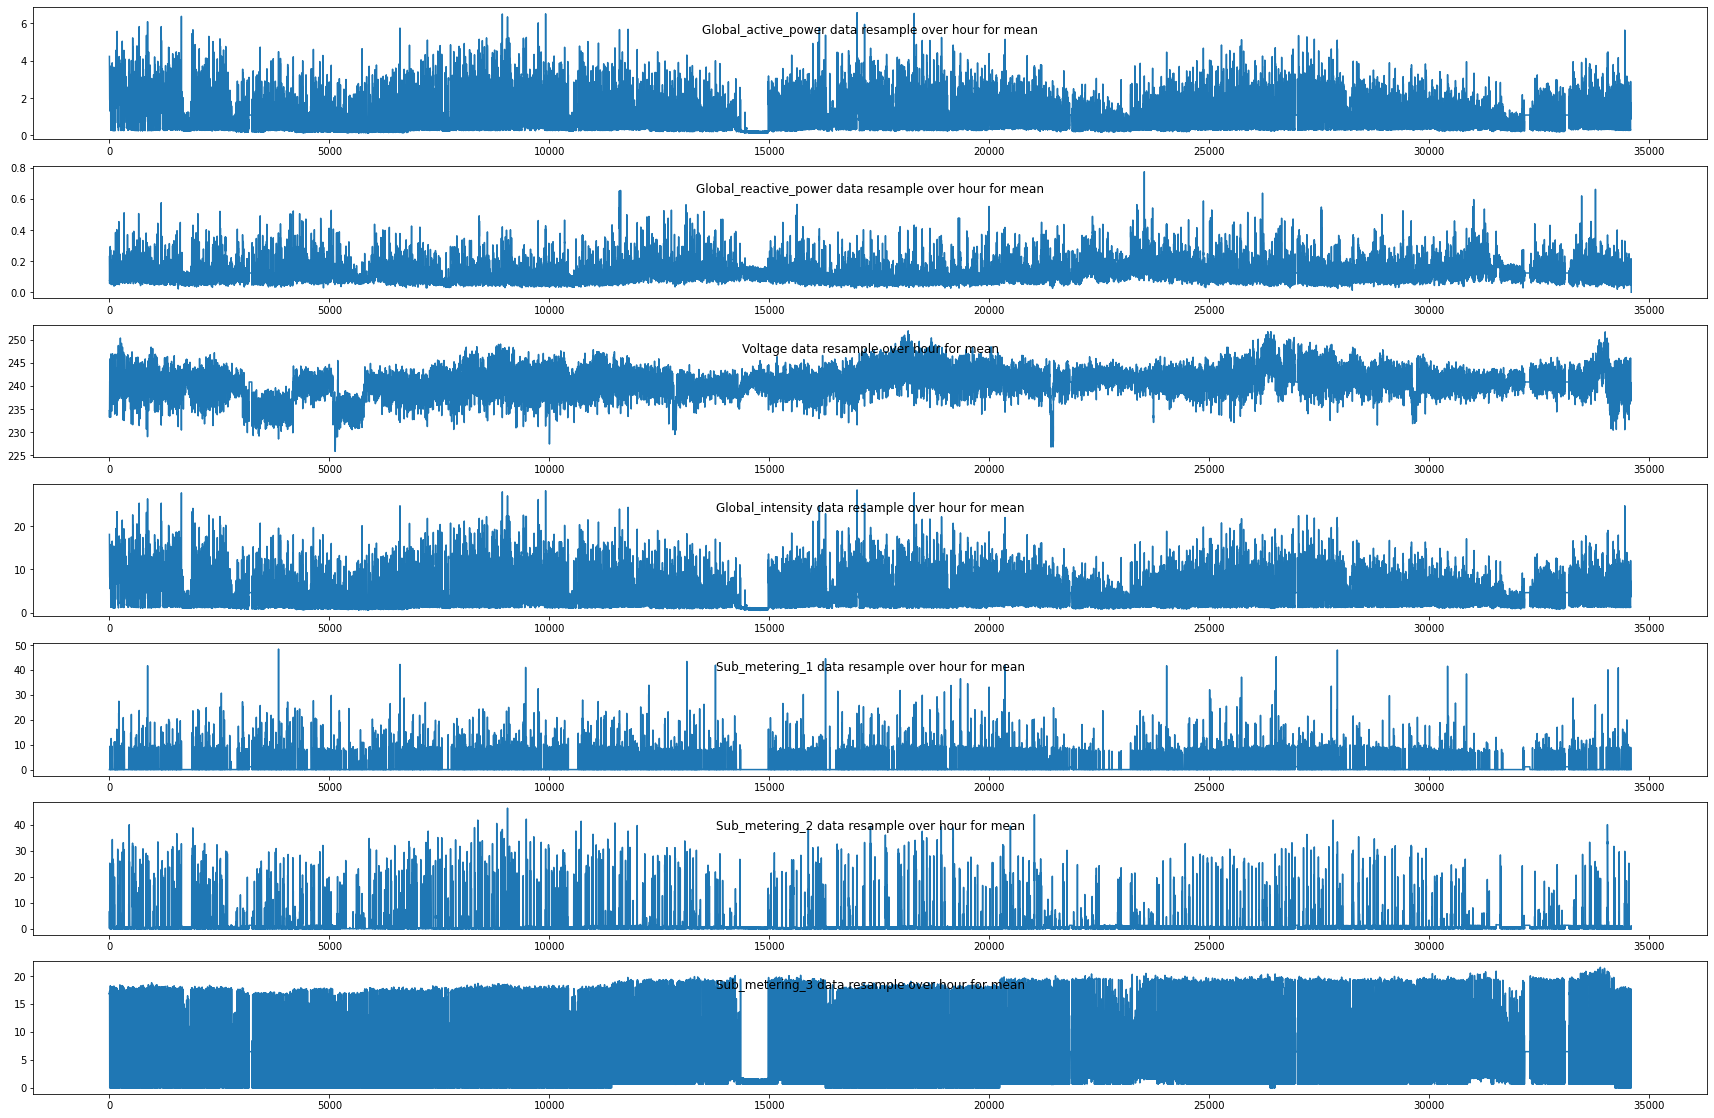

In [ ]:
# Hour wise Re-Sampling
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(30, 20))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over hour for mean', y=0.75, loc='center')
    i += 1
plt.show()

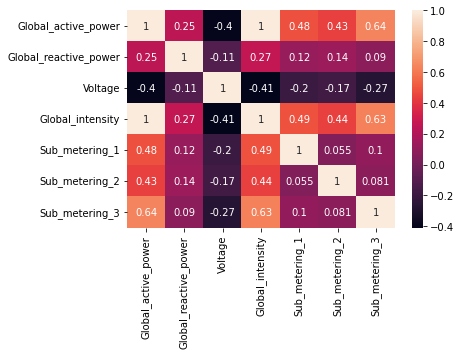

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.corr()

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000        0.489298        0.440347   
Sub_metering_1                 0.489298        1.000000        0.054721   
Sub_metering_2                 0.440347        0.054721        1.000000   
Sub_metering_3                 0.626543        0.102571        0.080872   

                       Sub_metering_3  
Global_active_power          0.638555  
Global_reactive_power        0.089617  
Voltage                     -0.268172  
Global_intensity             0.626543  
Sub_metering_1               0.102571  
Sub_metering_2               0.080872  
Sub_metering_3               1.000000

Therefore, if processing all the original data, the runtime will be very costly, but if processing data with large time-scale samples (e.g. monthly), it will affect the model's predictivity.

From Corelation Matrix, it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated.

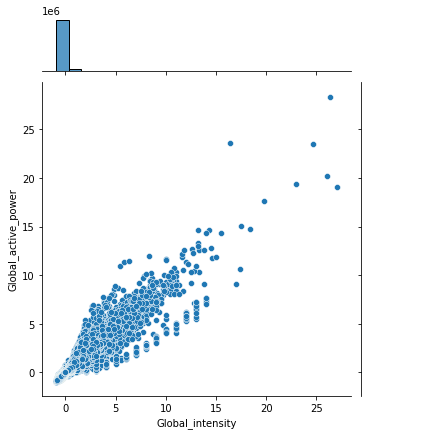

In [ ]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

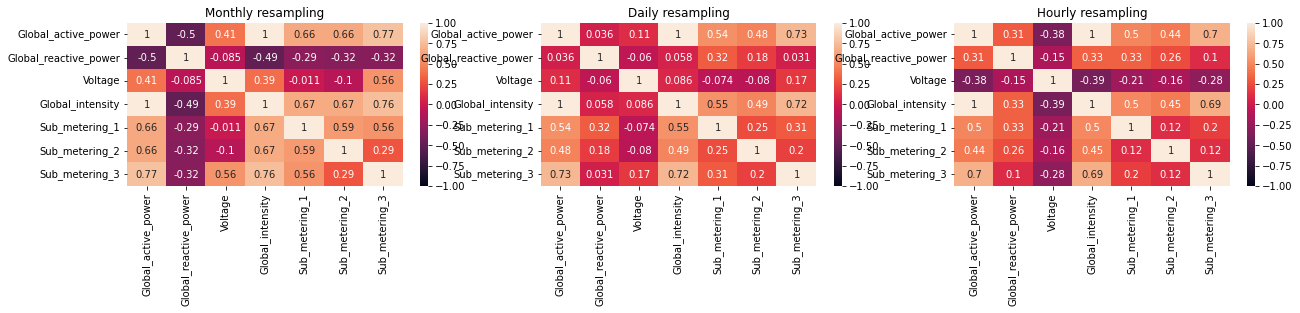

In [ ]:
import seaborn as sns
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(131)
dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

ax=f.add_subplot(132)
dfd = df.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)
  
ax=f.add_subplot(133)
dfh = df.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()

It is seen from above that with resampling techniques one can change the correlations among features.

Step 3: LSTM Data Preparation and fitting

In [ ]:
## The LSTM nueral network has been selected because:
## It is best suited for large data, time-seriers, and sequential problem. 
## In the first step, we will fram the problem to predict the Global_active_power.

In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

# sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

len(df)

2075259

Removing Outlier

In [ ]:
import numpy as np
for cols in df.iloc[:,2:].columns:
    print(cols)
    for x in [cols]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
        
        max1 = q75+(1.5*intr_qr)
        min1 = q25-(1.5*intr_qr)
        
        df.loc[df[x] < min1,x] = np.NaN
        df.loc[df[x] > max1,x] = np.NaN

# sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')    



Voltage
Global_intensity
Sub_metering_1
Sub_metering_2
Sub_metering_3


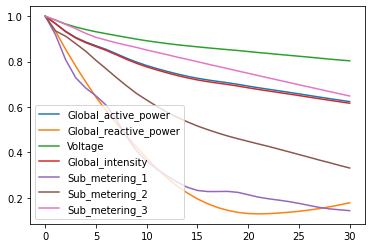

In [ ]:
#To fill in missing values, first check for linearity in each column using autocorelation plots
# Below, we get a plot of how autocorelation of different signals change with lag to better model the imputation
def get_acf(data,lags): 
    frame = []
    for i in range(lags+1):
        frame.append(data.apply(lambda col: col.autocorr(i), axis=0))
    return pd.DataFrame(frame).plot.line()
get_acf(df,30)

In [ ]:
# Seems like acfs start dropping after 10 lags for majority of signals. So lets do linear interpolation but with a limit of 10
# fill in missing values using linear interpolation with limit to 10 using autocorelation plot
# clean_data = df.interpolate(method = 'linear', axis = 0, limit = 1)

In [ ]:
df = df.fillna(df.mean())
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df = df[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
# We will frame the supervised learning problem as predicting the Global_active_power at the current time (t) 
# given the Global_active_power measurement and other features at the prior time step

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In order to reduce the computation time, and also get a quick result to test the model. We have resampled the data over hour to reduce the size of data from 2075259 to 34589 (data are given in minutes).

In [ ]:
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

So, we will have 7 input series variables and the 1 output variable for 'Global_active_power' at the current time in hour.

We also splitting the data into: train and validation sets. 
Let's select 4000 data over 34,589 dat to train, the rest will be used to test the model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()


var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
0   0.545045   0.103358   0.335501   0.541487   0.144652        0.0   
1   0.509006   0.110073   0.283802   0.502152   0.030869        0.0   
2   0.488550   0.096987   0.315987   0.481110   0.000000        0.0   
3   0.455597   0.099010   0.434417   0.449904   0.008973        0.0   
4   0.322555   0.072536   0.495847   0.323529   0.002872        0.0   

   var7(t-1)   var1(t)  
0   0.782676  0.636816  
1   0.774169  0.545045  
2   0.778809  0.509006  
3   0.798917  0.488550  
4   0.205723  0.455597

In [ ]:

# Data spliting into train and test data series. Only 1000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 30000
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# split into input and outputs
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(30000, 1, 7) (30000,) (4588, 1, 7) (4588,)


## **LSTM model setting :-**

(1) 100 neurons in the first visible layer

(2) dropout 10%

(3) 30 neuron for Dense Layer and then 1 neuron in the output layer for predicting Global_active_power

(4) The input shape will be 1 time step with 7 features

(5) The mean_squared_error loss function and the efficient adam version of stochastic gradient descent

(6) The model will be fit for 50 training epochs with a batch size of 70.

Epoch 1/25
429/429 - 5s - loss: 0.0119 - val_loss: 0.0066 - 5s/epoch - 11ms/step
Epoch 2/25
429/429 - 2s - loss: 0.0097 - val_loss: 0.0065 - 2s/epoch - 4ms/step
Epoch 3/25
429/429 - 2s - loss: 0.0096 - val_loss: 0.0064 - 2s/epoch - 5ms/step
Epoch 4/25
429/429 - 2s - loss: 0.0095 - val_loss: 0.0064 - 2s/epoch - 4ms/step
Epoch 5/25
429/429 - 2s - loss: 0.0095 - val_loss: 0.0064 - 2s/epoch - 4ms/step
Epoch 6/25
429/429 - 2s - loss: 0.0094 - val_loss: 0.0063 - 2s/epoch - 4ms/step
Epoch 7/25
429/429 - 2s - loss: 0.0094 - val_loss: 0.0063 - 2s/epoch - 4ms/step
Epoch 8/25
429/429 - 2s - loss: 0.0093 - val_loss: 0.0063 - 2s/epoch - 4ms/step
Epoch 9/25
429/429 - 2s - loss: 0.0093 - val_loss: 0.0063 - 2s/epoch - 4ms/step
Epoch 10/25
429/429 - 2s - loss: 0.0093 - val_loss: 0.0063 - 2s/epoch - 4ms/step
Epoch 11/25
429/429 - 2s - loss: 0.0093 - val_loss: 0.0062 - 2s/epoch - 4ms/step
Epoch 12/25
429/429 - 2s - loss: 0.0093 - val_loss: 0.0062 - 2s/epoch - 4ms/step
Epoch 13/25
429/429 - 2s - loss: 0.0

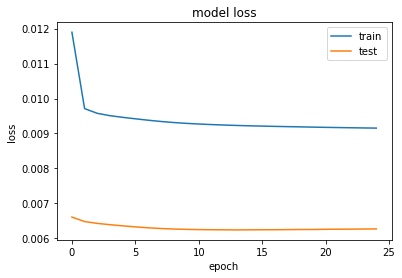

144/144 [==============================] - 1s 2ms/step


In [ ]:

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

model1 = Sequential()
model1.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
# model1.add(Dropout(0.1))
model1.add(Dense(30))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model1.fit(train_x, train_y, epochs=25, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model1.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


Mean Absolute Error: 0.376
Mean Squared Error:  0.260
Test RMSE: 0.510


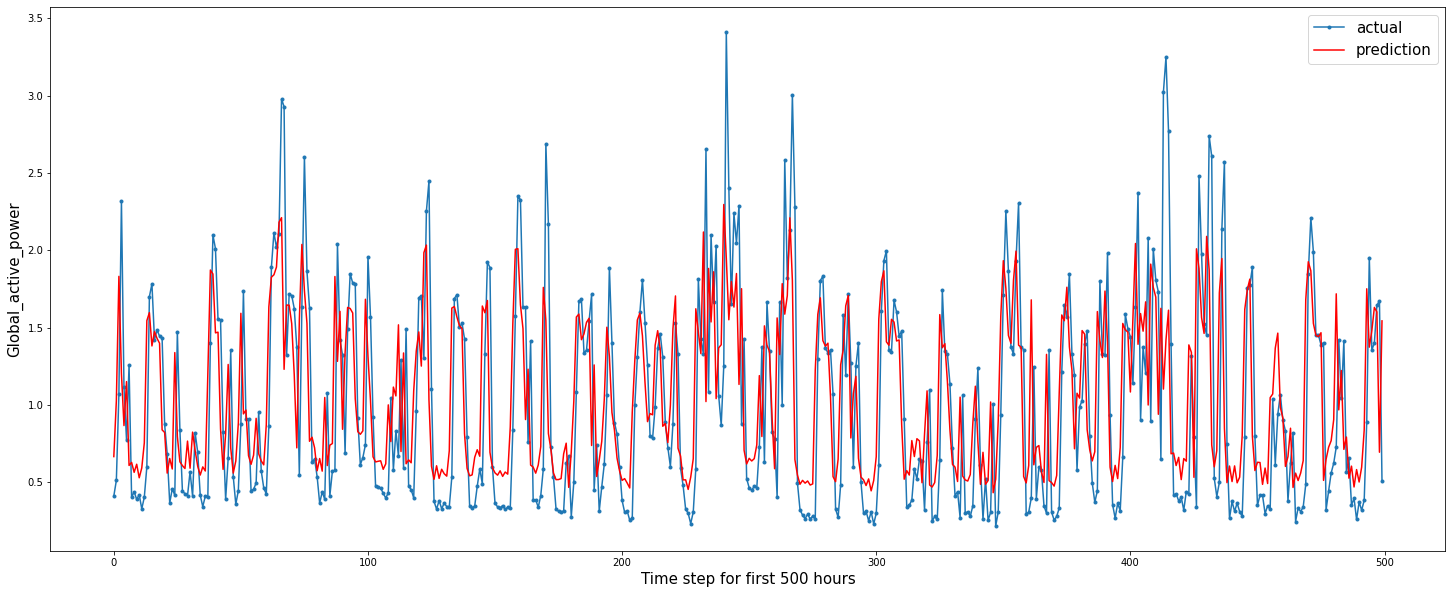

In [ ]:
# ERROR METRICES
print('Mean Absolute Error: %.3f' % mean_absolute_error(inv_y, inv_yhat)) 
print('Mean Squared Error:  %.3f' % mean_squared_error(inv_y, inv_yhat)) 
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


# Note that, we have resampled the database into hour, so, every time step is one hour. We try first to check the prediction in 500 hours.
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

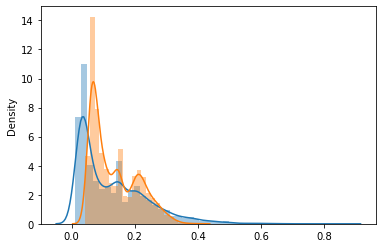

In [ ]:
sns.distplot(test_y)
sns.distplot(yhat)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


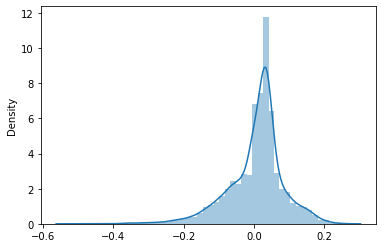

In [ ]:
sns.distplot(yhat-test_y)

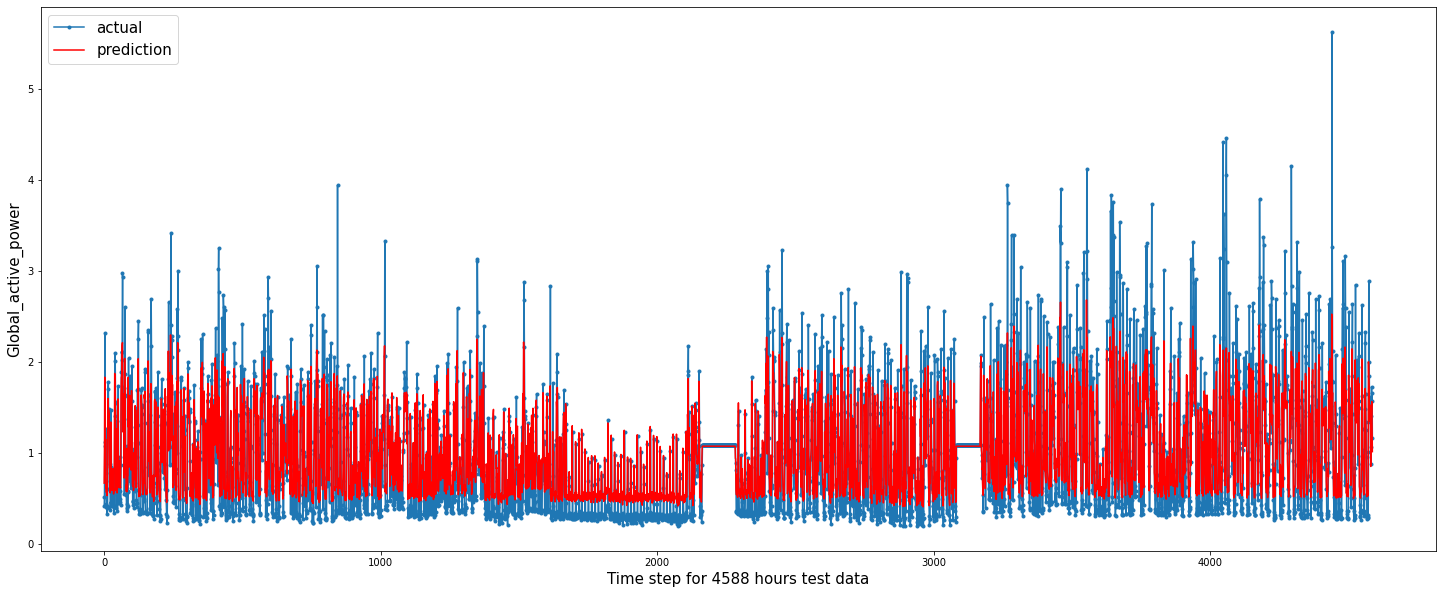

In [ ]:
aa=[x for x in range(4588)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y, marker='.', label="actual")
plt.plot(aa, inv_yhat, 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for 4588 hours test data', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
inv_y.shape

(4588,)

In [ ]:
len(inv_yhat)

4588

In [ ]:
inv_yhat[1]

1.0325165693561238

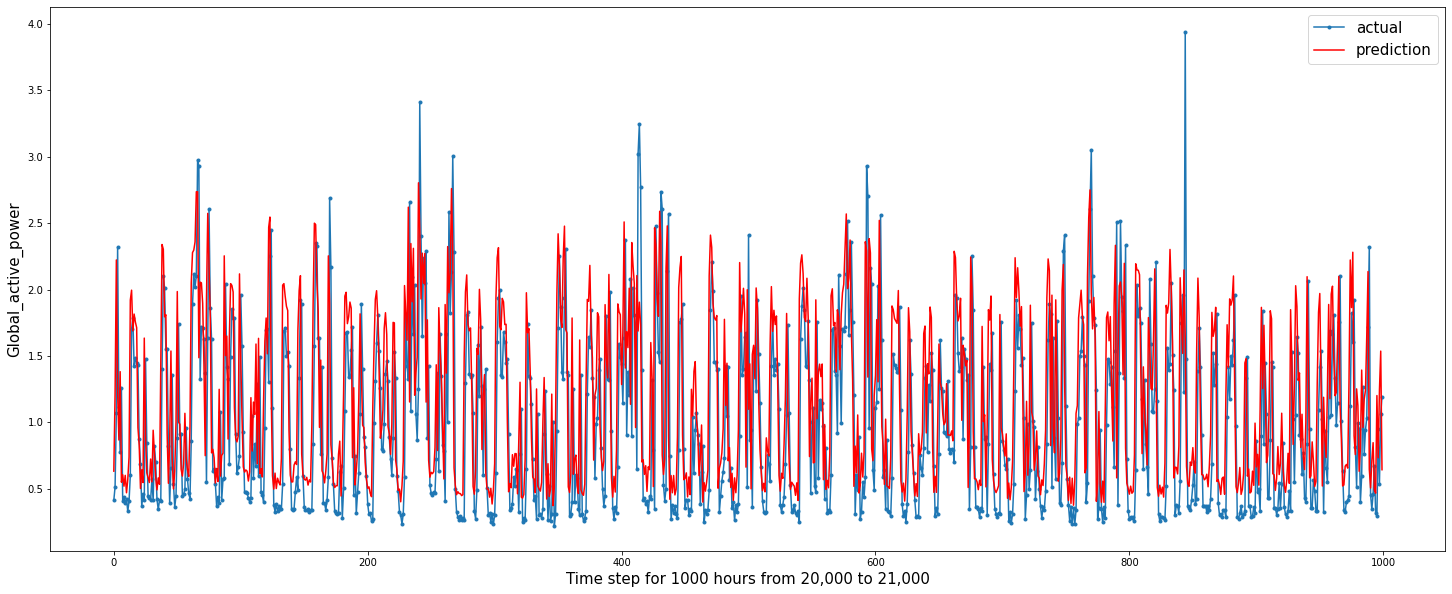

In [ ]:
## WHEN WE DID IT IN HOUR WISE Prediction

"""
aa=[x for x in range(1000)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[20000:21000], marker='.', label="actual")
plt.plot(aa, inv_yhat[20000:21000], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for 1000 hours from 20,000 to 21,000', size=15)
plt.legend(fontsize=15)
plt.show()
"""

Now, let's try to fit and predict the Sub_metering_3

Epoch 1/50
300/300 - 6s - loss: 0.0131 - val_loss: 0.0070 - 6s/epoch - 19ms/step
Epoch 2/50
300/300 - 3s - loss: 0.0102 - val_loss: 0.0067 - 3s/epoch - 10ms/step
Epoch 3/50
300/300 - 3s - loss: 0.0099 - val_loss: 0.0066 - 3s/epoch - 9ms/step
Epoch 4/50
300/300 - 3s - loss: 0.0098 - val_loss: 0.0065 - 3s/epoch - 9ms/step
Epoch 5/50
300/300 - 2s - loss: 0.0097 - val_loss: 0.0065 - 2s/epoch - 7ms/step
Epoch 6/50
300/300 - 2s - loss: 0.0097 - val_loss: 0.0065 - 2s/epoch - 7ms/step
Epoch 7/50
300/300 - 2s - loss: 0.0096 - val_loss: 0.0064 - 2s/epoch - 6ms/step
Epoch 8/50
300/300 - 3s - loss: 0.0096 - val_loss: 0.0064 - 3s/epoch - 12ms/step
Epoch 9/50
300/300 - 3s - loss: 0.0096 - val_loss: 0.0064 - 3s/epoch - 9ms/step
Epoch 10/50
300/300 - 1s - loss: 0.0096 - val_loss: 0.0064 - 1s/epoch - 5ms/step
Epoch 11/50
300/300 - 3s - loss: 0.0095 - val_loss: 0.0064 - 3s/epoch - 11ms/step
Epoch 12/50
300/300 - 2s - loss: 0.0095 - val_loss: 0.0064 - 2s/epoch - 7ms/step
Epoch 13/50
300/300 - 3s - loss: 

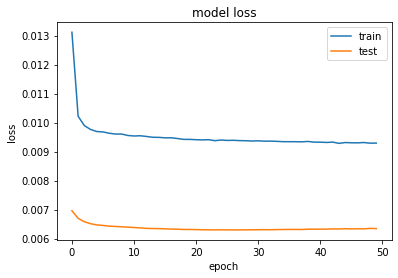

144/144 [==============================] - 1s 2ms/step


In [ ]:
df = df[['Sub_metering_3','Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1']]

from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 30000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model7 = Sequential()
model7.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model7.add(Dropout(0.1))
model7.add(Dense(1))
model7.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model7.fit(train_x, train_y, epochs=50, batch_size=100, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model7.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Mean Absolute Error: 0.362
Mean Squared Error:  0.263
Test RMSE: 0.513


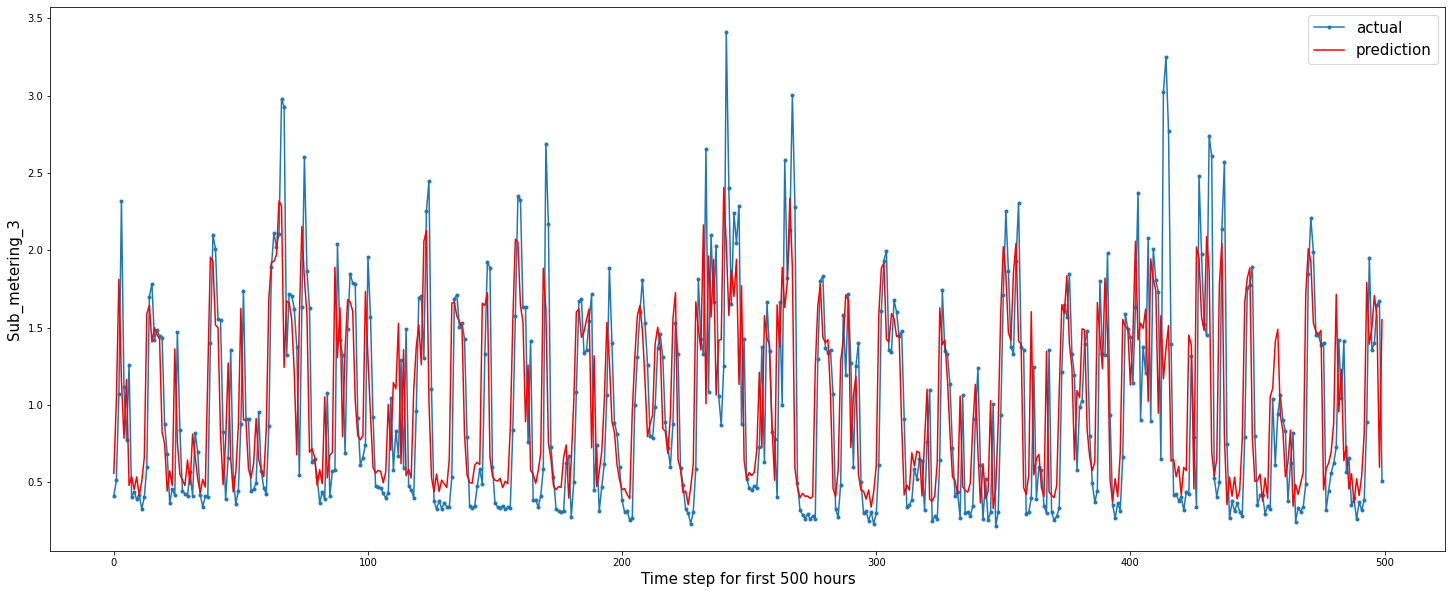

In [ ]:
# ERROR METRICES
print('Mean Absolute Error: %.3f' % mean_absolute_error(inv_y, inv_yhat)) 
print('Mean Squared Error:  %.3f' % mean_squared_error(inv_y, inv_yhat)) 
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# Note that, we have resampled the database into hour, so, every time step is one hour. We try first to check the prediction in 500 hours.
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

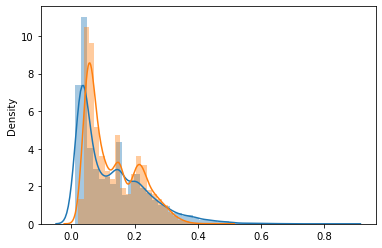

In [ ]:
sns.distplot(test_y)
sns.distplot(yhat)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


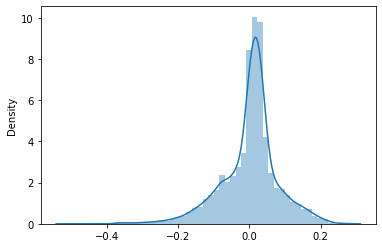

In [ ]:
sns.distplot(yhat-test_y)

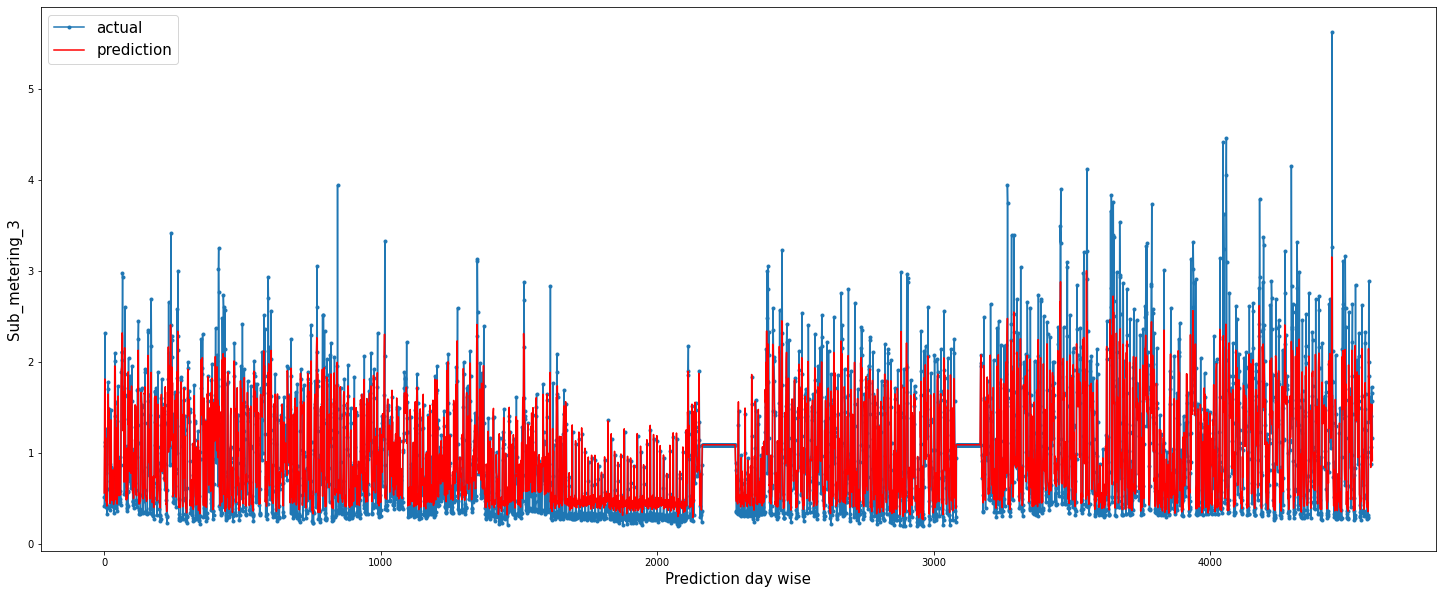

In [ ]:
kk = len(inv_yhat)
aa=[x for x in range(kk)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:kk], marker='.', label="actual")
plt.plot(aa, inv_yhat[:kk], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
# plt.xlabel('Time step for first 440 hours', size=15)
plt.xlabel('Prediction day wise', size=15)
plt.legend(fontsize=15)
plt.show()

Now, let's try to fit and predict the Global Reactive Power

Voltage
Global_intensity
Sub_metering_1
Sub_metering_2
Sub_metering_3
Epoch 1/20
300/300 - 4s - loss: 0.0061 - val_loss: 0.0056 - 4s/epoch - 12ms/step
Epoch 2/20
300/300 - 2s - loss: 0.0054 - val_loss: 0.0055 - 2s/epoch - 8ms/step
Epoch 3/20
300/300 - 3s - loss: 0.0054 - val_loss: 0.0055 - 3s/epoch - 11ms/step
Epoch 4/20
300/300 - 3s - loss: 0.0054 - val_loss: 0.0054 - 3s/epoch - 9ms/step
Epoch 5/20
300/300 - 3s - loss: 0.0054 - val_loss: 0.0054 - 3s/epoch - 9ms/step
Epoch 6/20
300/300 - 4s - loss: 0.0054 - val_loss: 0.0054 - 4s/epoch - 12ms/step
Epoch 7/20
300/300 - 3s - loss: 0.0054 - val_loss: 0.0054 - 3s/epoch - 11ms/step
Epoch 8/20
300/300 - 2s - loss: 0.0054 - val_loss: 0.0054 - 2s/epoch - 7ms/step
Epoch 9/20
300/300 - 2s - loss: 0.0054 - val_loss: 0.0054 - 2s/epoch - 7ms/step
Epoch 10/20
300/300 - 2s - loss: 0.0054 - val_loss: 0.0054 - 2s/epoch - 8ms/step
Epoch 11/20
300/300 - 2s - loss: 0.0054 - val_loss: 0.0054 - 2s/epoch - 8ms/step
Epoch 12/20
300/300 - 2s - loss: 0.0054 - va

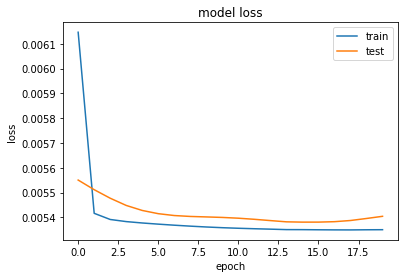

144/144 [==============================] - 1s 2ms/step


In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

# sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

len(df)

import numpy as np
for cols in df.iloc[:,2:].columns:
    print(cols)
    for x in [cols]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
        
        max1 = q75+(1.5*intr_qr)
        min1 = q25-(1.5*intr_qr)
        
        df.loc[df[x] < min1,x] = np.NaN
        df.loc[df[x] > max1,x] = np.NaN

# sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')    



df = df.fillna(df.mean())
df.isnull().sum()



df = df[['Global_reactive_power', 'Sub_metering_3','Global_active_power',  'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1']]

df_resample = df.resample('h').mean() 
df_resample.shape 





from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

# Scalarization
values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 30000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))




model2 = Sequential()
model2.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
# model2.add(Dropout(0.1))
model2.add(Dense(30))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model2.fit(train_x, train_y, epochs=20, batch_size=100, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model2.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


Mean Absolute Error: 0.043
Mean Squared Error:  0.003
Test RMSE: 0.057


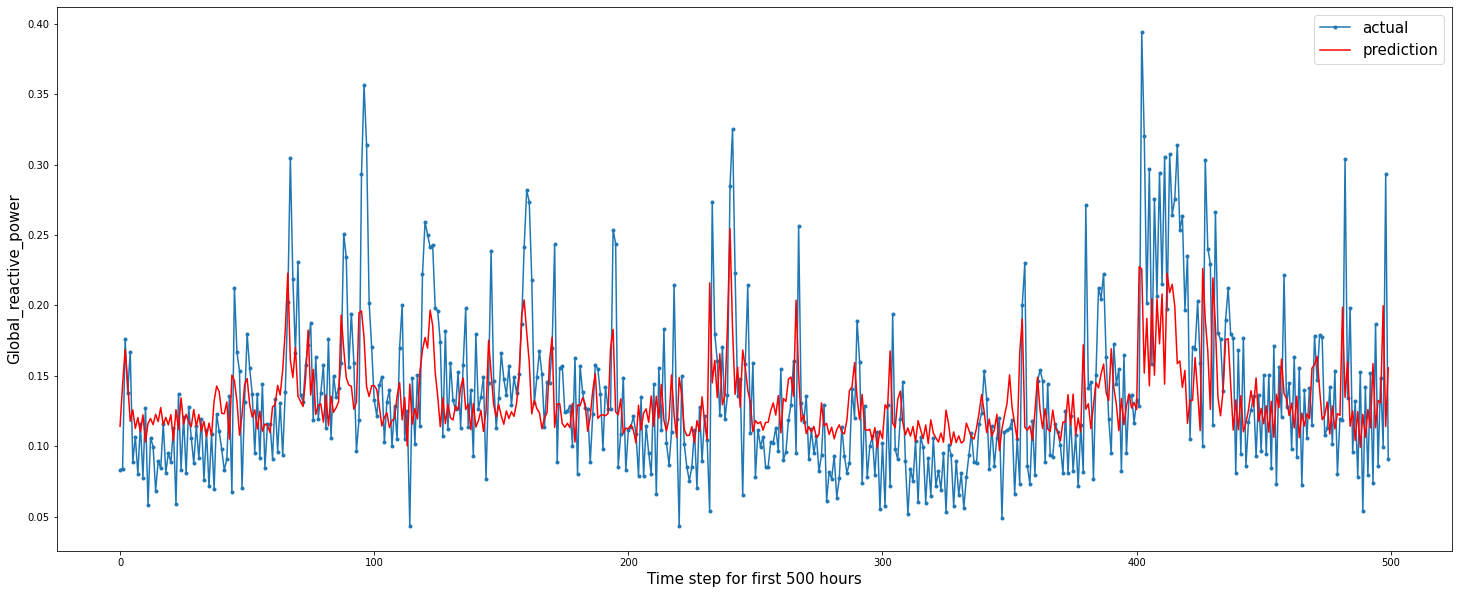

In [ ]:
# ERROR METRICES
print('Mean Absolute Error: %.3f' % mean_absolute_error(inv_y, inv_yhat)) 
print('Mean Squared Error:  %.3f' % mean_squared_error(inv_y, inv_yhat)) 
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# Note that, we have resampled the database into hour, so, every time step is one hour. We try first to check the prediction in 500 hours.
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

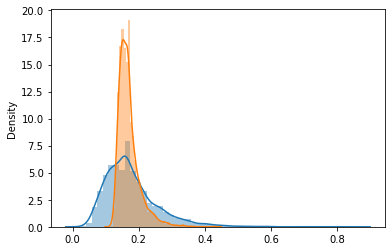

In [ ]:
sns.distplot(test_y)
sns.distplot(yhat)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


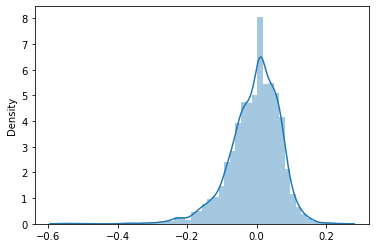

In [ ]:
sns.distplot(yhat-test_y)

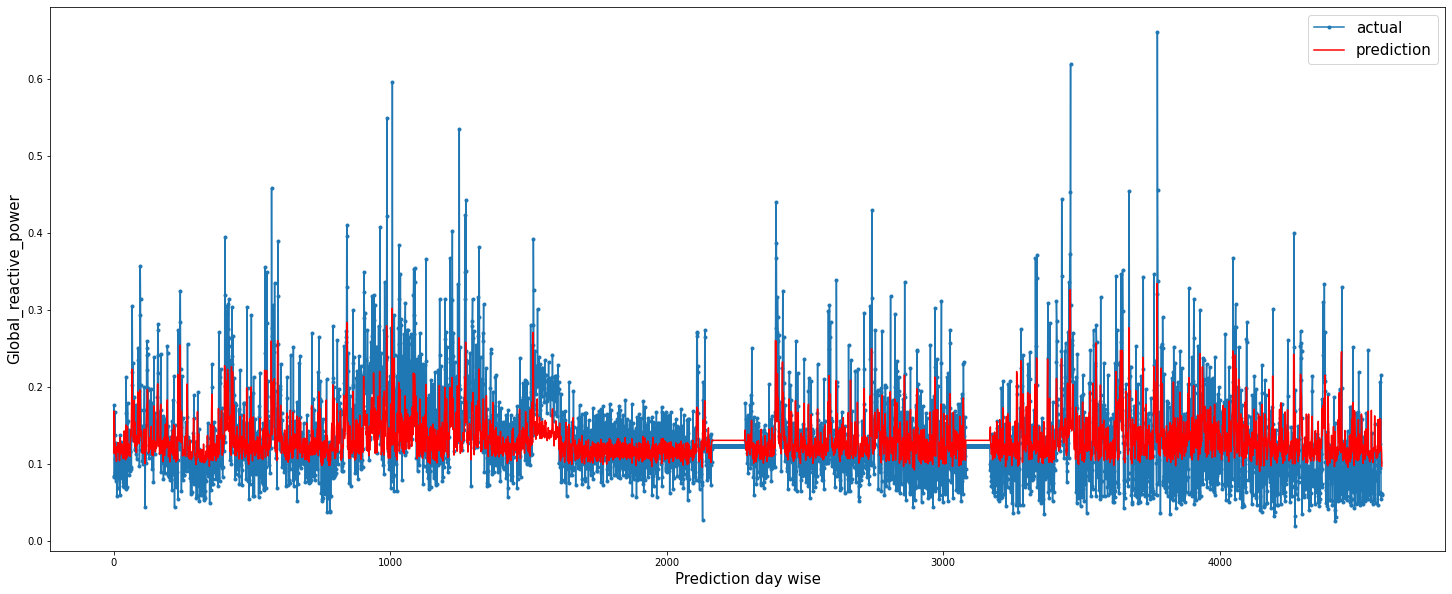

In [ ]:

kk = len(inv_yhat)
aa=[x for x in range(kk)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:kk], marker='.', label="actual")
plt.plot(aa, inv_yhat[:kk], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
# plt.xlabel('Time step for first 440 hours', size=15)
plt.xlabel('Prediction day wise', size=15)
plt.legend(fontsize=15)
plt.show()

Now, lets predict Voltage

Epoch 1/13
300/300 - 6s - loss: 0.0328 - val_loss: 0.0041 - 6s/epoch - 20ms/step
Epoch 2/13
300/300 - 2s - loss: 0.0055 - val_loss: 0.0036 - 2s/epoch - 6ms/step
Epoch 3/13
300/300 - 2s - loss: 0.0050 - val_loss: 0.0034 - 2s/epoch - 6ms/step
Epoch 4/13
300/300 - 2s - loss: 0.0047 - val_loss: 0.0032 - 2s/epoch - 5ms/step
Epoch 5/13
300/300 - 2s - loss: 0.0046 - val_loss: 0.0031 - 2s/epoch - 6ms/step
Epoch 6/13
300/300 - 2s - loss: 0.0045 - val_loss: 0.0031 - 2s/epoch - 6ms/step
Epoch 7/13
300/300 - 2s - loss: 0.0044 - val_loss: 0.0030 - 2s/epoch - 6ms/step
Epoch 8/13
300/300 - 2s - loss: 0.0044 - val_loss: 0.0030 - 2s/epoch - 6ms/step
Epoch 9/13
300/300 - 2s - loss: 0.0044 - val_loss: 0.0030 - 2s/epoch - 5ms/step
Epoch 10/13
300/300 - 1s - loss: 0.0044 - val_loss: 0.0030 - 1s/epoch - 5ms/step
Epoch 11/13
300/300 - 2s - loss: 0.0043 - val_loss: 0.0031 - 2s/epoch - 6ms/step
Epoch 12/13
300/300 - 2s - loss: 0.0043 - val_loss: 0.0031 - 2s/epoch - 6ms/step
Epoch 13/13
300/300 - 2s - loss: 0.0

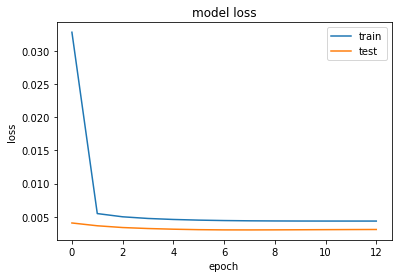

144/144 [==============================] - 1s 2ms/step


In [ ]:
df = df[['Voltage', 'Global_active_power',  'Global_reactive_power', 'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

df_resample = df.resample('h').mean() 
df_resample.shape 

from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 30000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model3 = Sequential()
model3.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
# model3.add(Dropout(0.1))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model3.fit(train_x, train_y, epochs=13, batch_size=100, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model3.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Mean Absolute Error: 1.099
Mean Squared Error:  2.091
Test RMSE: 1.446


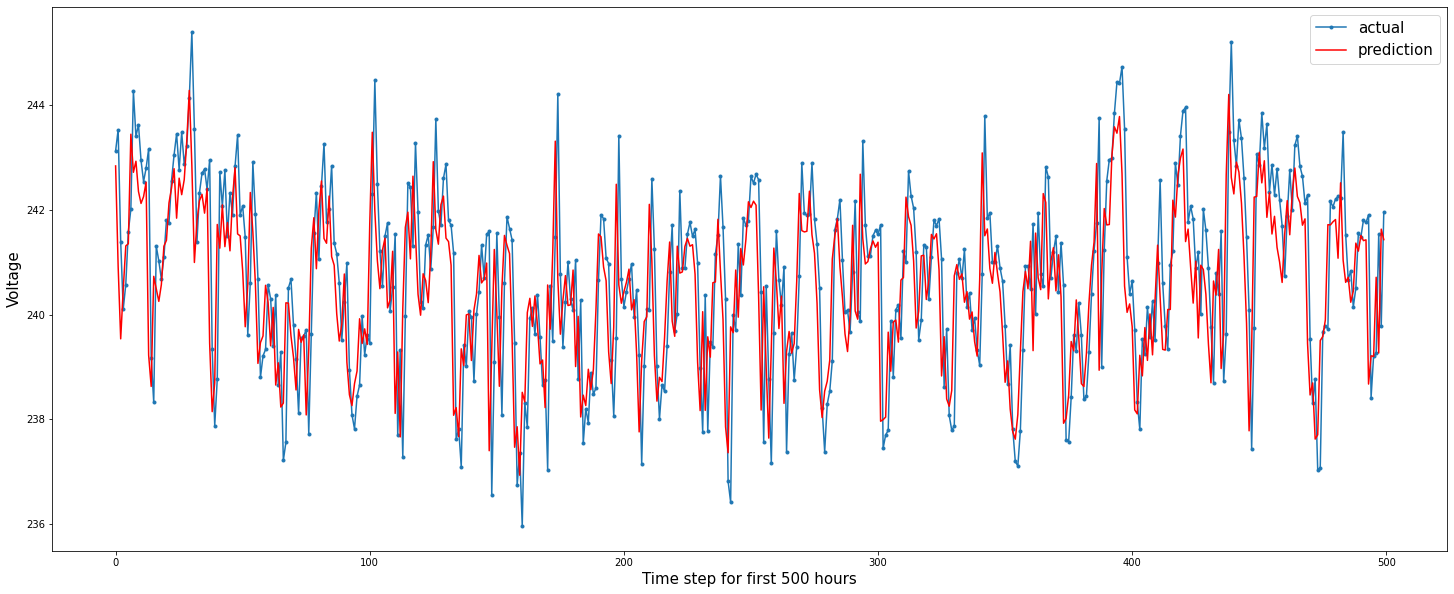

In [ ]:
# ERROR METRICES
print('Mean Absolute Error: %.3f' % mean_absolute_error(inv_y, inv_yhat)) 
print('Mean Squared Error:  %.3f' % mean_squared_error(inv_y, inv_yhat)) 
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


# Note that, we have resampled the database into hour, so, every time step is one hour. We try first to check the prediction in 500 hours.
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

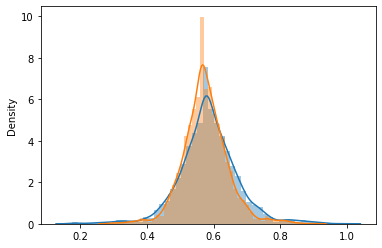

In [ ]:
sns.distplot(test_y)
sns.distplot(yhat)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


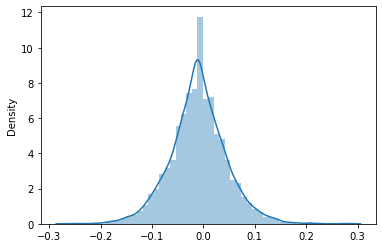

In [ ]:
sns.distplot(yhat-test_y)

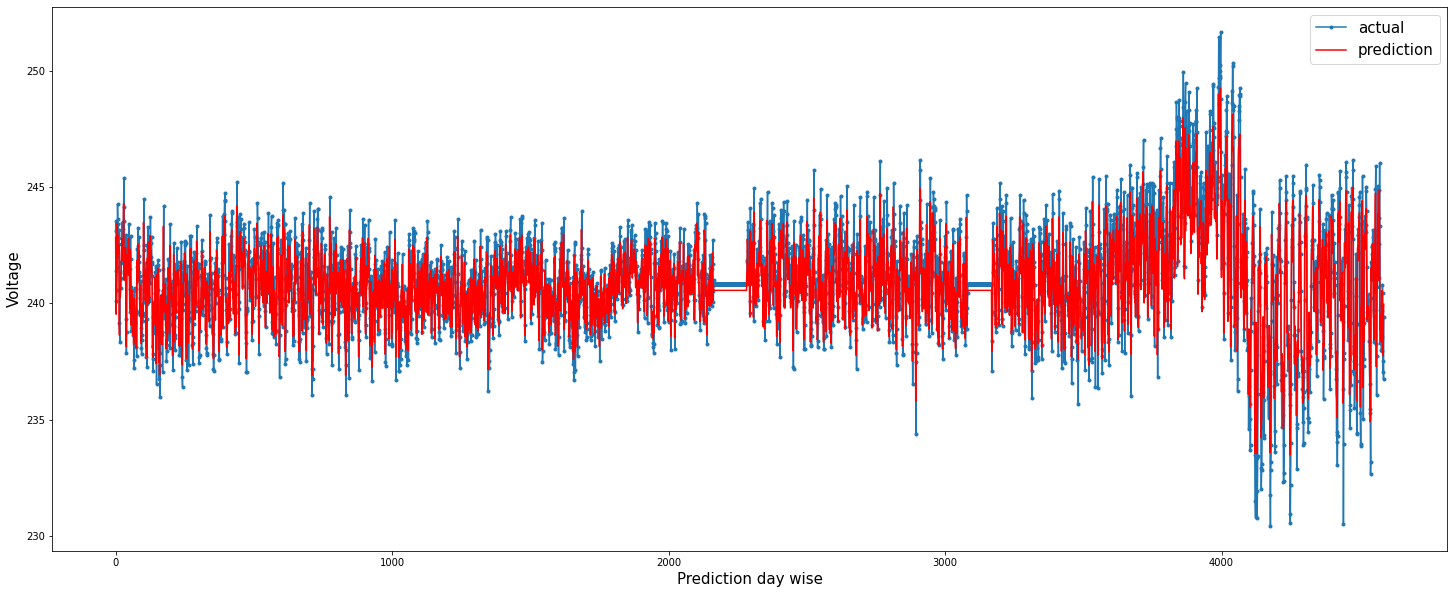

In [ ]:
kk = len(inv_yhat)
aa=[x for x in range(kk)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:kk], marker='.', label="actual")
plt.plot(aa, inv_yhat[:kk], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
# plt.xlabel('Time step for first 440 hours', size=15)
plt.xlabel('Prediction day wise', size=15)
plt.legend(fontsize=15)
plt.show()

Global Intensity

Epoch 1/70
300/300 - 4s - loss: 0.0114 - val_loss: 0.0062 - 4s/epoch - 13ms/step
Epoch 2/70
300/300 - 1s - loss: 0.0092 - val_loss: 0.0061 - 1s/epoch - 5ms/step
Epoch 3/70
300/300 - 1s - loss: 0.0091 - val_loss: 0.0060 - 1s/epoch - 5ms/step
Epoch 4/70
300/300 - 1s - loss: 0.0090 - val_loss: 0.0060 - 1s/epoch - 5ms/step
Epoch 5/70
300/300 - 1s - loss: 0.0090 - val_loss: 0.0060 - 1s/epoch - 5ms/step
Epoch 6/70
300/300 - 1s - loss: 0.0090 - val_loss: 0.0059 - 1s/epoch - 5ms/step
Epoch 7/70
300/300 - 1s - loss: 0.0089 - val_loss: 0.0059 - 1s/epoch - 5ms/step
Epoch 8/70
300/300 - 1s - loss: 0.0089 - val_loss: 0.0059 - 1s/epoch - 5ms/step
Epoch 9/70
300/300 - 1s - loss: 0.0089 - val_loss: 0.0059 - 1s/epoch - 5ms/step
Epoch 10/70
300/300 - 1s - loss: 0.0089 - val_loss: 0.0059 - 1s/epoch - 5ms/step
Epoch 11/70
300/300 - 1s - loss: 0.0088 - val_loss: 0.0059 - 1s/epoch - 5ms/step
Epoch 12/70
300/300 - 1s - loss: 0.0088 - val_loss: 0.0058 - 1s/epoch - 5ms/step
Epoch 13/70
300/300 - 1s - loss: 0.0

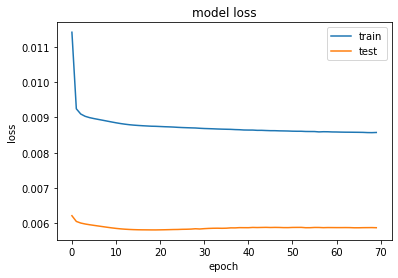

144/144 [==============================] - 1s 2ms/step


In [ ]:
df = df[['Global_intensity', 'Global_active_power',  'Global_reactive_power', 'Voltage', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

df_resample = df.resample('h').mean() 
df_resample.shape 

from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 30000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model4 = Sequential()
model4.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
# model3.add(Dropout(0.1))
model4.add(Dense(30))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model4.fit(train_x, train_y, epochs=70, batch_size=100, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model4.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Mean Absolute Error: 1.492
Mean Squared Error:  4.565
Test RMSE: 2.137


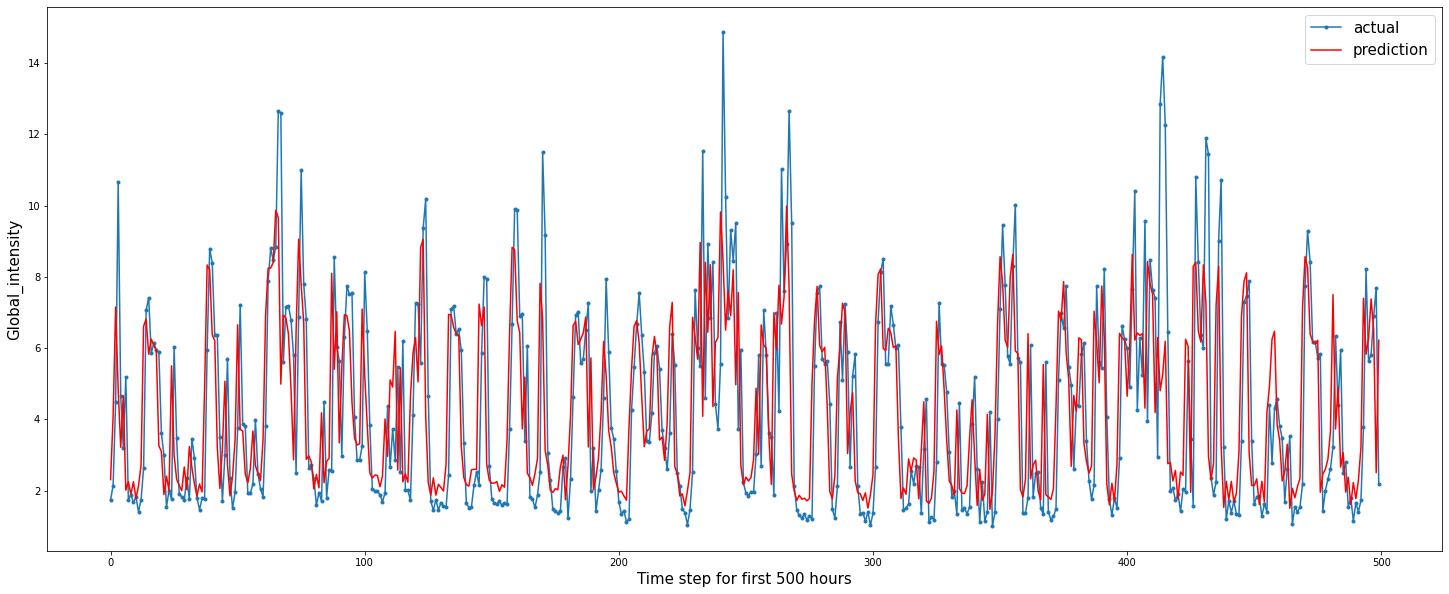

In [ ]:
# ERROR METRICES
print('Mean Absolute Error: %.3f' % mean_absolute_error(inv_y, inv_yhat)) 
print('Mean Squared Error:  %.3f' % mean_squared_error(inv_y, inv_yhat)) 
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# Note that, we have resampled the database into hour, so, every time step is one hour. We try first to check the prediction in 500 hours.
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

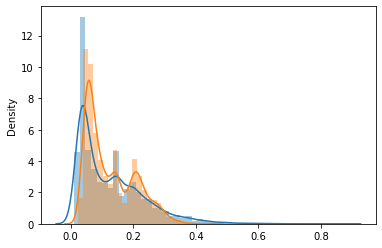

In [ ]:
sns.distplot(test_y)
sns.distplot(yhat)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


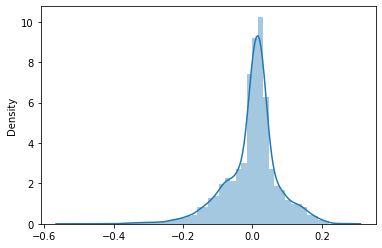

In [ ]:
sns.distplot(yhat-test_y)

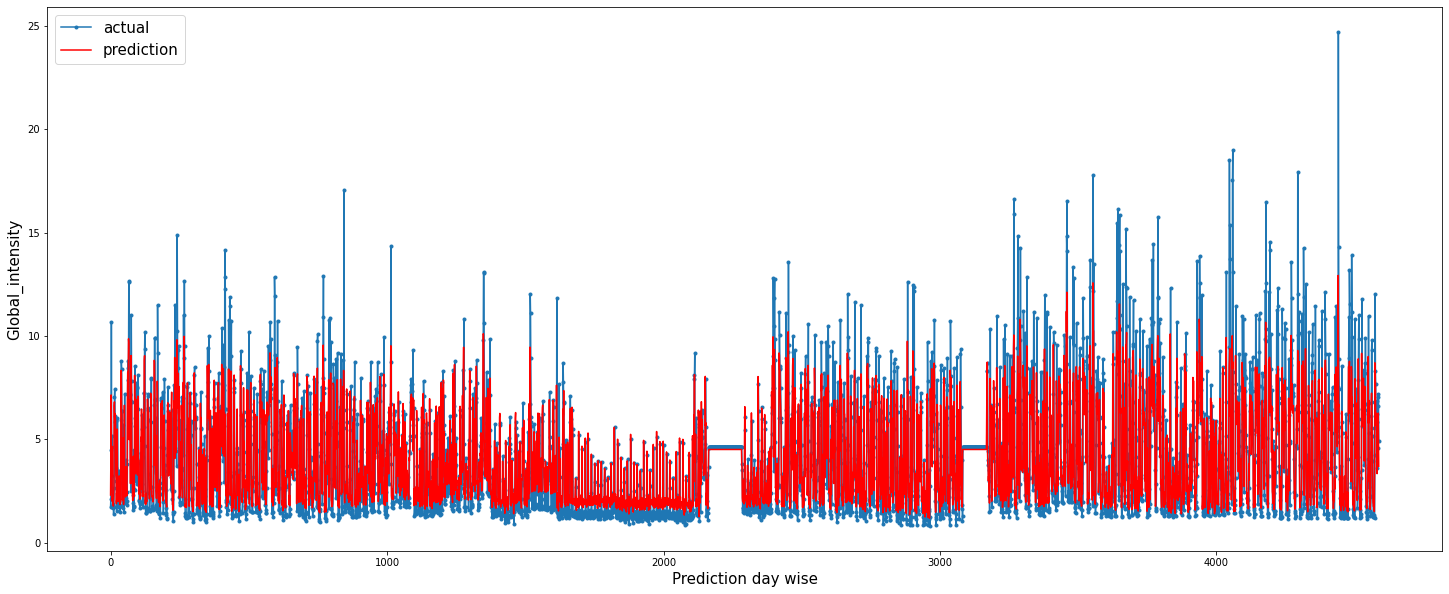

In [ ]:
kk = len(inv_yhat)
aa=[x for x in range(kk)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:kk], marker='.', label="actual")
plt.plot(aa, inv_yhat[:kk], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
# plt.xlabel('Time step for first 440 hours', size=15)
plt.xlabel('Prediction day wise', size=15)
plt.legend(fontsize=15)
plt.show()

Sub Metering 1

Epoch 1/50
300/300 - 5s - loss: 0.0048 - val_loss: 0.0033 - 5s/epoch - 16ms/step
Epoch 2/50
300/300 - 2s - loss: 0.0046 - val_loss: 0.0033 - 2s/epoch - 8ms/step
Epoch 3/50
300/300 - 2s - loss: 0.0045 - val_loss: 0.0033 - 2s/epoch - 8ms/step
Epoch 4/50
300/300 - 2s - loss: 0.0045 - val_loss: 0.0033 - 2s/epoch - 8ms/step
Epoch 5/50
300/300 - 2s - loss: 0.0045 - val_loss: 0.0032 - 2s/epoch - 8ms/step
Epoch 6/50
300/300 - 2s - loss: 0.0045 - val_loss: 0.0033 - 2s/epoch - 8ms/step
Epoch 7/50
300/300 - 2s - loss: 0.0045 - val_loss: 0.0032 - 2s/epoch - 8ms/step
Epoch 8/50
300/300 - 2s - loss: 0.0045 - val_loss: 0.0032 - 2s/epoch - 8ms/step
Epoch 9/50
300/300 - 3s - loss: 0.0045 - val_loss: 0.0032 - 3s/epoch - 10ms/step
Epoch 10/50
300/300 - 3s - loss: 0.0045 - val_loss: 0.0032 - 3s/epoch - 9ms/step
Epoch 11/50
300/300 - 3s - loss: 0.0045 - val_loss: 0.0032 - 3s/epoch - 9ms/step
Epoch 12/50
300/300 - 3s - loss: 0.0045 - val_loss: 0.0032 - 3s/epoch - 9ms/step
Epoch 13/50
300/300 - 3s - loss: 0.

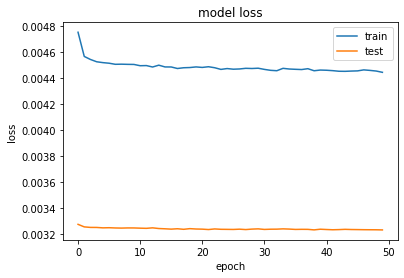

144/144 [==============================] - 1s 3ms/step


In [ ]:
df = df[['Sub_metering_1', 'Global_active_power',  'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_2','Sub_metering_3']]

df_resample = df.resample('h').mean() 
df_resample.shape 

from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 30000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model5 = Sequential()
model5.add(LSTM(200, input_shape=(train_x.shape[1], train_x.shape[2])))
model5.add(Dropout(0.5))
model5.add(Dense(1))
model5.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model5.fit(train_x, train_y, epochs=50, batch_size=100, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model5.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Mean Absolute Error: 1.168
Mean Squared Error:  7.563
Test RMSE: 2.750


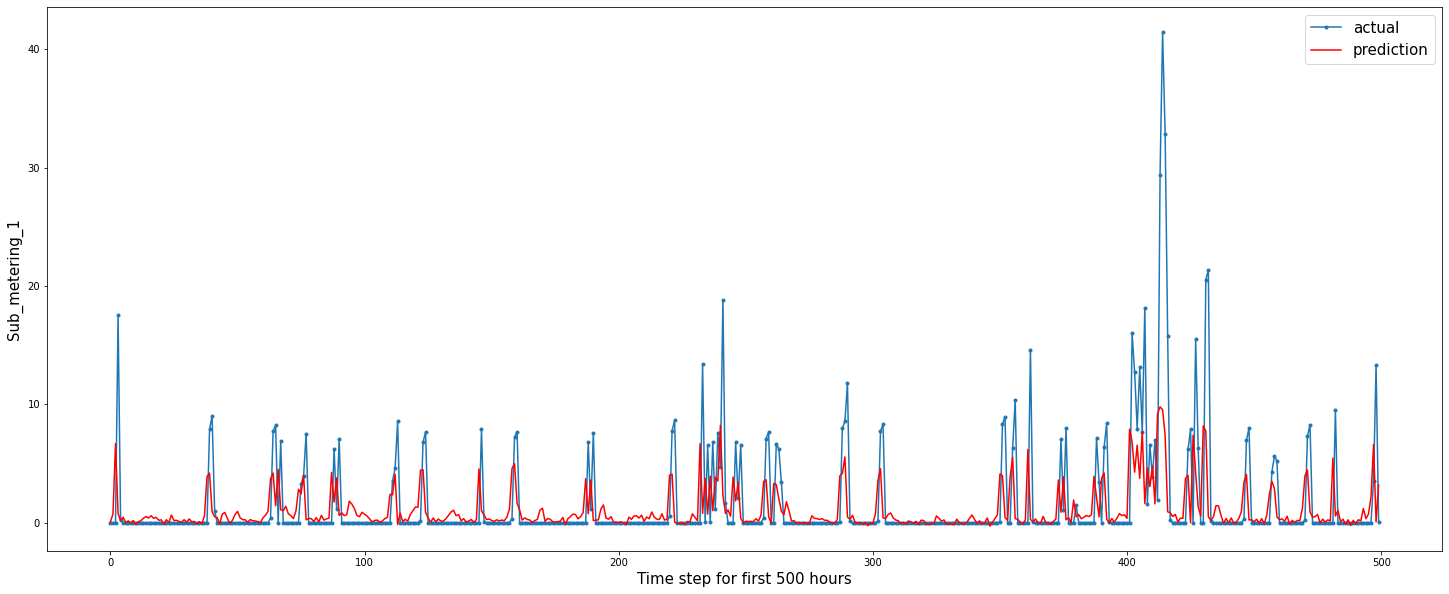

In [ ]:
# ERROR METRICES
print('Mean Absolute Error: %.3f' % mean_absolute_error(inv_y, inv_yhat)) 
print('Mean Squared Error:  %.3f' % mean_squared_error(inv_y, inv_yhat)) 
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)



# Note that, we have resampled the database into hour, so, every time step is one hour. We try first to check the prediction in 500 hours.
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

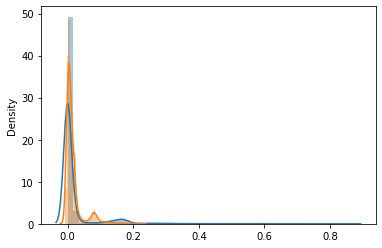

In [ ]:
sns.distplot(test_y)
sns.distplot(yhat)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


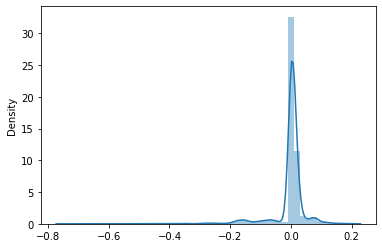

In [ ]:
sns.distplot(yhat-test_y)

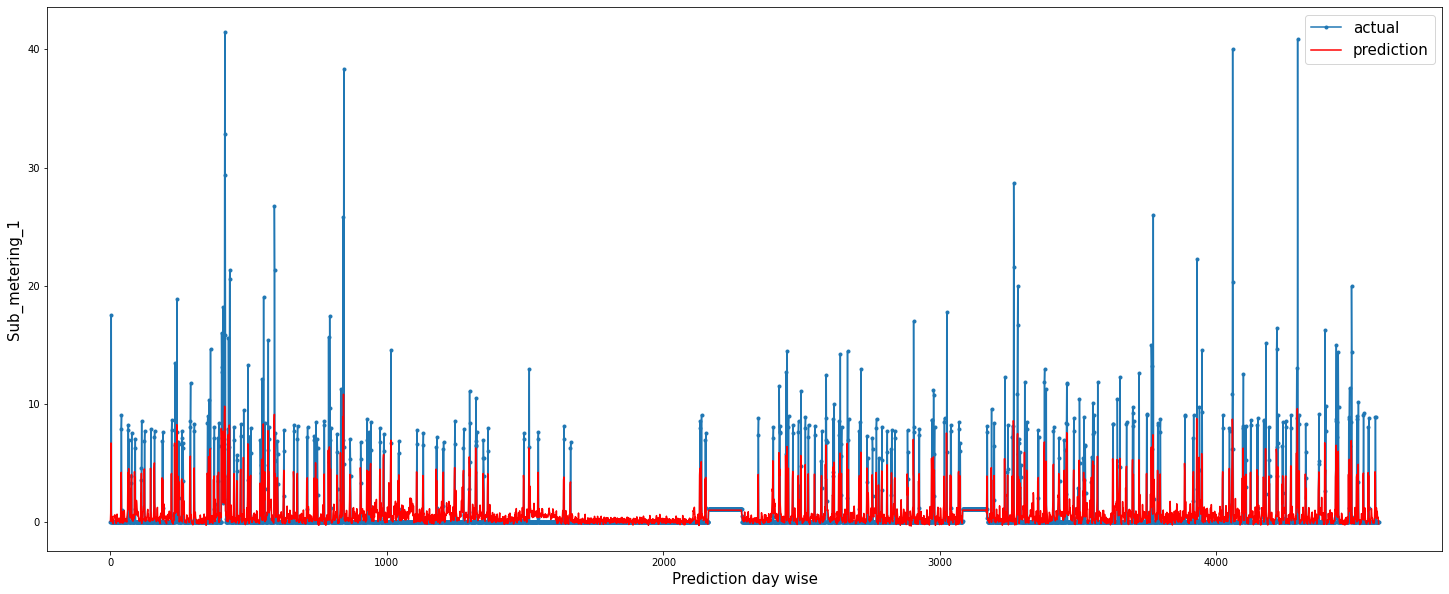

In [ ]:
kk = len(inv_yhat)
aa=[x for x in range(kk)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:kk], marker='.', label="actual")
plt.plot(aa, inv_yhat[:kk], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
# plt.xlabel('Time step for first 440 hours', size=15)
plt.xlabel('Prediction day wise', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
test_x[-7:].shape

(7, 7)

In [ ]:
test_x.shape

(427, 7)

Sub Metering 2

Epoch 1/25
300/300 - 5s - loss: 0.0074 - val_loss: 0.0033 - 5s/epoch - 18ms/step
Epoch 2/25
300/300 - 3s - loss: 0.0071 - val_loss: 0.0033 - 3s/epoch - 10ms/step
Epoch 3/25
300/300 - 4s - loss: 0.0071 - val_loss: 0.0032 - 4s/epoch - 12ms/step
Epoch 4/25
300/300 - 3s - loss: 0.0070 - val_loss: 0.0032 - 3s/epoch - 11ms/step
Epoch 5/25
300/300 - 4s - loss: 0.0070 - val_loss: 0.0032 - 4s/epoch - 12ms/step
Epoch 6/25
300/300 - 3s - loss: 0.0070 - val_loss: 0.0032 - 3s/epoch - 11ms/step
Epoch 7/25
300/300 - 2s - loss: 0.0069 - val_loss: 0.0032 - 2s/epoch - 7ms/step
Epoch 8/25
300/300 - 2s - loss: 0.0069 - val_loss: 0.0032 - 2s/epoch - 8ms/step
Epoch 9/25
300/300 - 2s - loss: 0.0069 - val_loss: 0.0032 - 2s/epoch - 8ms/step
Epoch 10/25
300/300 - 3s - loss: 0.0069 - val_loss: 0.0032 - 3s/epoch - 9ms/step
Epoch 11/25
300/300 - 3s - loss: 0.0068 - val_loss: 0.0032 - 3s/epoch - 9ms/step
Epoch 12/25
300/300 - 3s - loss: 0.0068 - val_loss: 0.0032 - 3s/epoch - 9ms/step
Epoch 13/25
300/300 - 2s - loss

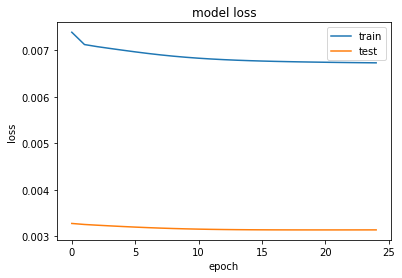

144/144 [==============================] - 1s 2ms/step


In [ ]:
df = df[['Sub_metering_2', 'Global_active_power',  'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1','Sub_metering_3']]

df_resample = df.resample('h').mean() 
df_resample.shape 

from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 30000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model6 = Sequential()
model6.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
# model3.add(Dropout(0.5))
model6.add(Dense(1))
model6.compile(loss='mean_squared_error', optimizer='RMSprop')

# Network fitting
history = model6.fit(train_x, train_y, epochs=25, batch_size=100, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model6.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Mean Absolute Error: 1.023
Mean Squared Error:  6.770
Test RMSE: 2.602


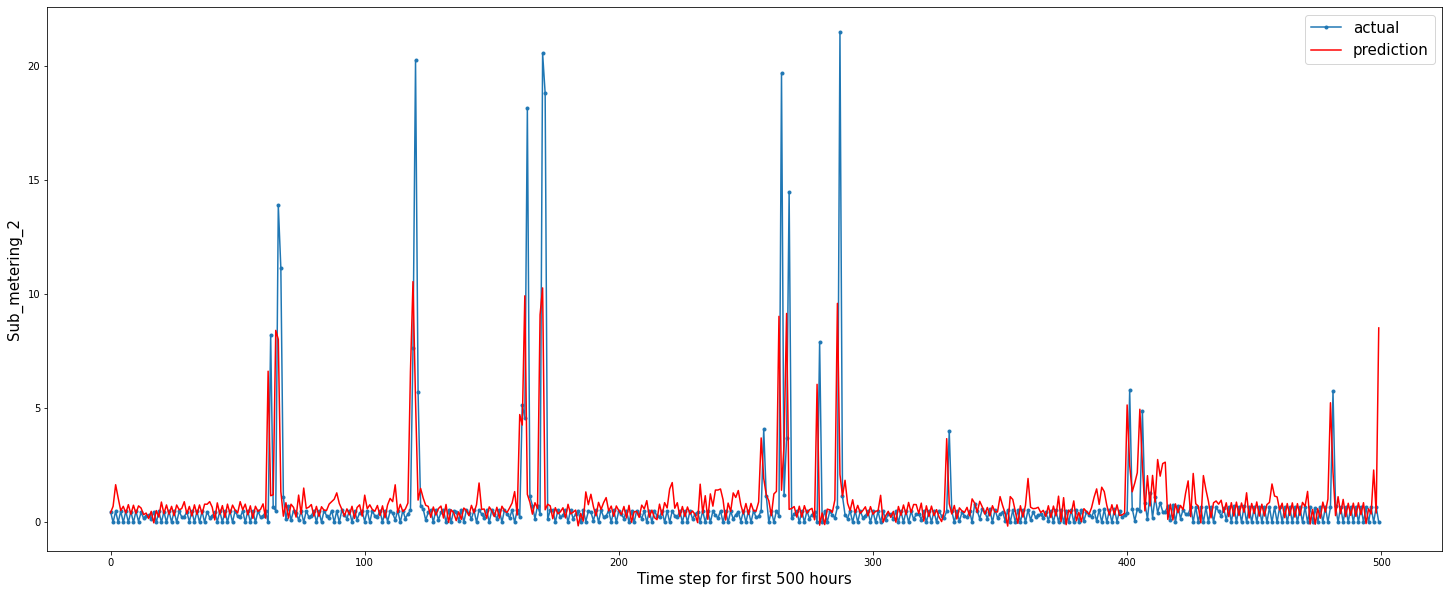

In [ ]:
# ERROR METRICES
print('Mean Absolute Error: %.3f' % mean_absolute_error(inv_y, inv_yhat)) 
print('Mean Squared Error:  %.3f' % mean_squared_error(inv_y, inv_yhat)) 
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


# Note that, we have resampled the database into hour, so, every time step is one hour. We try first to check the prediction in 500 hours.
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

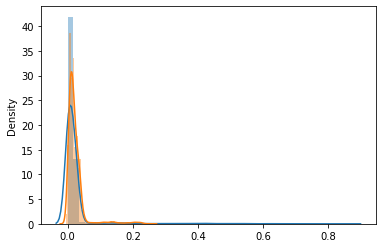

In [ ]:
sns.distplot(test_y)
sns.distplot(yhat)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


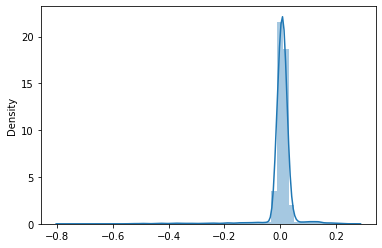

In [ ]:
sns.distplot(yhat-test_y)

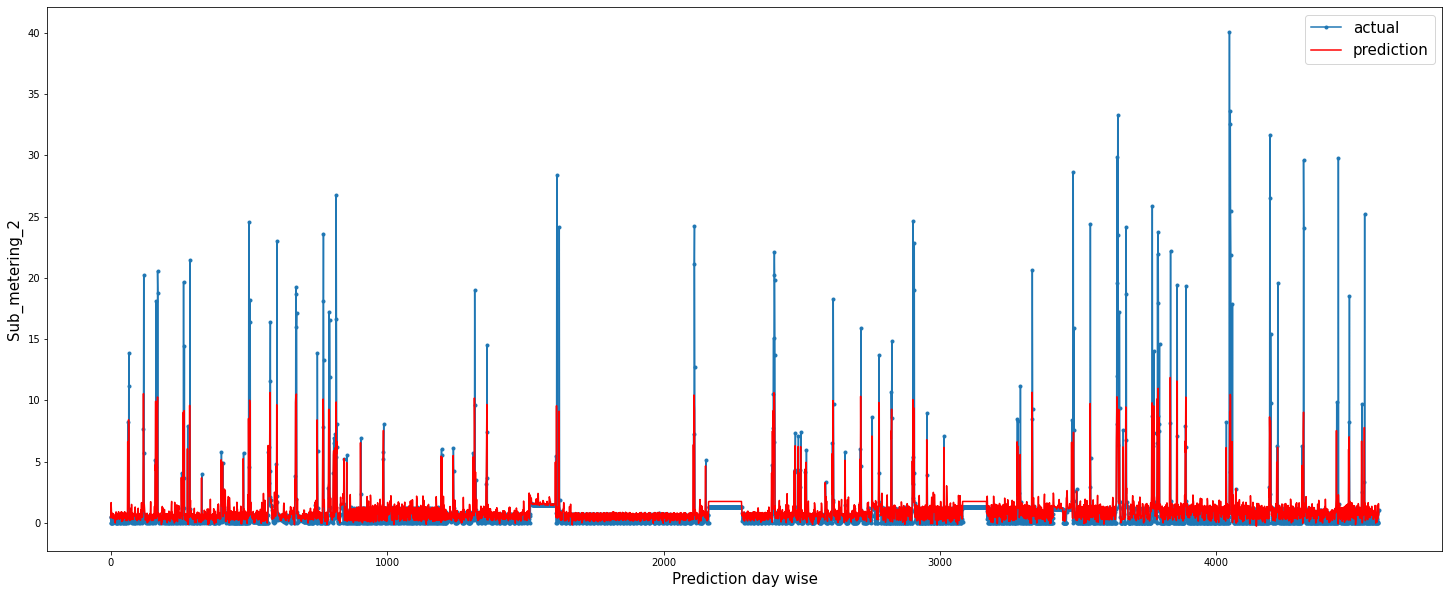

In [ ]:
kk = len(inv_yhat)
aa=[x for x in range(kk)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:kk], marker='.', label="actual")
plt.plot(aa, inv_yhat[:kk], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
# plt.xlabel('Time step for first 440 hours', size=15)
plt.xlabel('Prediction day wise', size=15)
plt.legend(fontsize=15)
plt.show()

## **Conclusions:-**
In this Notebook, we practice to use the LSTM to fit and predict household electric power consumption.

Consideration of the amount of input data is important to balance model accuracy and computation cost.

The database can be used 30% for fitting purposes and the rest can be used to validate the model.